In [494]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading train and test files

In [495]:
train=pd.read_csv("train_final.csv")

In [496]:
test=pd.read_csv("test_final.csv")

In [497]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [498]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [499]:
train.shape

(79853, 12)

In [500]:
test.shape

(34224, 11)

In [501]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [502]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [503]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [504]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

In [505]:
train['Count_6-12_months_late'].isnull().sum()/len(train['Count_6-12_months_late'])

0.0012147320701789538

# Univariate Analysis

<AxesSubplot:>

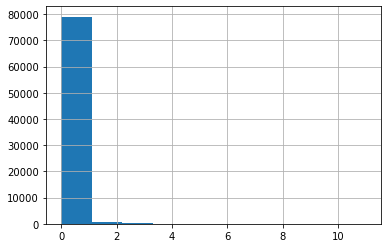

In [506]:
train['Count_more_than_12_months_late'].hist()

<AxesSubplot:>

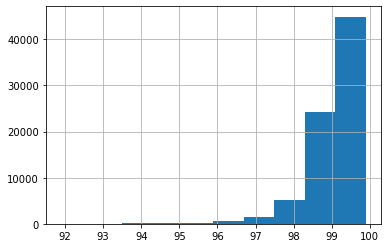

In [507]:
train['application_underwriting_score'].hist()

<AxesSubplot:>

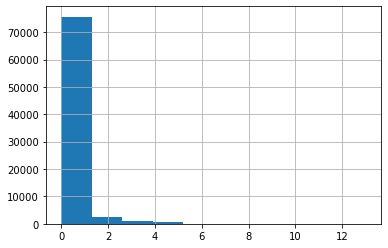

In [508]:
train['Count_3-6_months_late'].hist()

<AxesSubplot:>

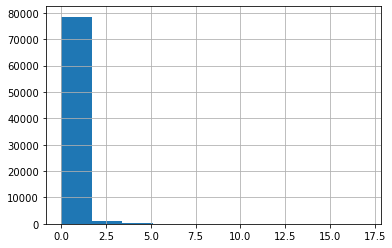

In [509]:
train['Count_6-12_months_late'].hist()

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

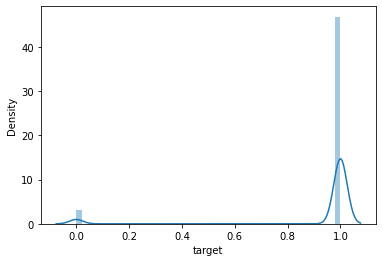

In [510]:
sns.distplot(train['target'])

In [511]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_premiums_paid', ylabel='Density'>

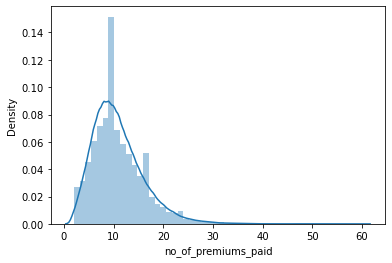

In [512]:
  sns.distplot(train['no_of_premiums_paid'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

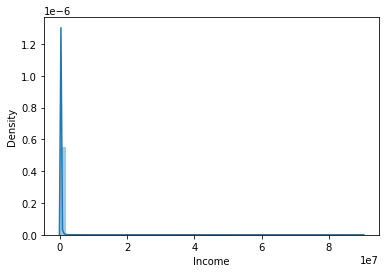

In [513]:
sns.distplot(train['Income'])

# Bivariate Analysis

In [514]:
train.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


<AxesSubplot:>

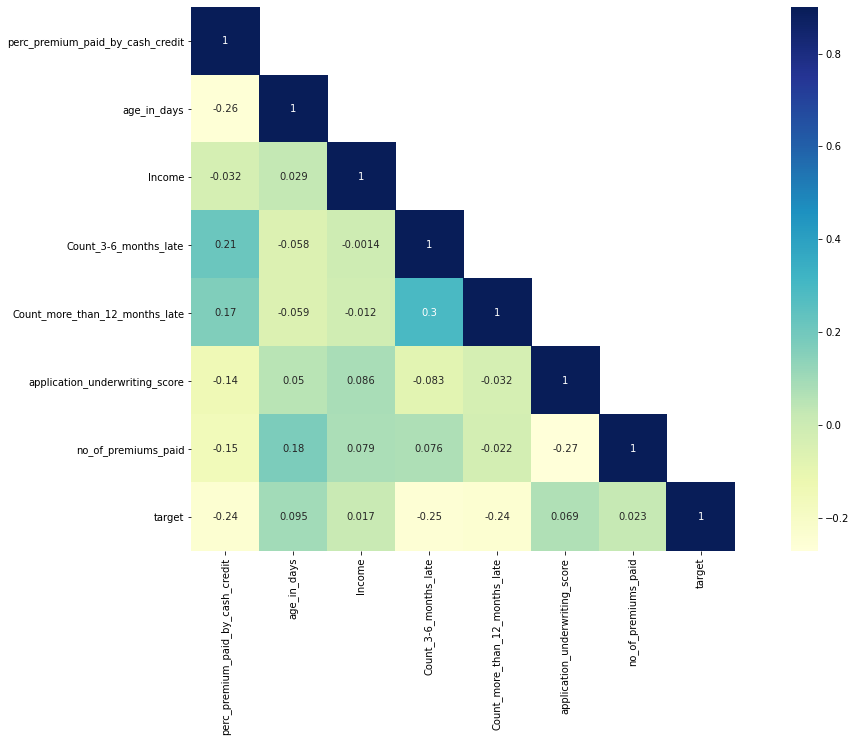

In [515]:
corr = train[["perc_premium_paid_by_cash_credit","age_in_days","Income","Count_3-6_months_late","Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid","target"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# Creating dummies for train dataset

In [551]:
mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = train.drop('target', axis=1)
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

# Missing value treatment of train dataset

In [517]:
label_df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [518]:
label_df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.822799,0.603396
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,1.052060,0.489195
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,0.000000,0.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,0.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,2.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,4.000000,1.000000


In [519]:
label_df['application_underwriting_score'].isnull().sum()/len(train['application_underwriting_score'])

0.03724343481146607

In [520]:
label_df['Count_3-6_months_late'].isnull().sum()/len(train['Count_3-6_months_late'])

0.0012147320701789538

In [521]:
label_df['Count_6-12_months_late'].isnull().sum()/len(train['Count_6-12_months_late'])

0.0012147320701789538

In [522]:
label_df['Count_more_than_12_months_late'].isnull().sum()/len(train['Count_more_than_12_months_late'])

0.0012147320701789538

In [523]:
#filling the missing values in application_underwriting_score with its median

label_df['application_underwriting_score'].fillna(train['application_underwriting_score'].median(),inplace=True)

In [524]:
#filling the missing values in Count_3-6_months_late with 0

label_df['Count_3-6_months_late'].fillna(0,inplace=True)

In [525]:
#filling the missing values in Count_6-12_months_late with 0

label_df['Count_6-12_months_late'].fillna(0,inplace=True)

In [526]:
#filling the missing values in Count_more_than_12_months_late with 0

label_df['Count_more_than_12_months_late'].fillna(0,inplace=True)

In [527]:
label_df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

# Creating dummies for test dataset

In [528]:
tmappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

test_df = test
for i, col in enumerate(label_df):
    if test_df[col].dtype == 'object':
        test_df[col] = label_encoder.fit_transform(np.array(test_df[col].astype(str)).reshape((-1,)))
        tmappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

# Missing value treatment of test dataset

In [529]:
test_df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [530]:
test_df['application_underwriting_score'].isnull().sum()/len(test['application_underwriting_score'])

0.03865708274894811

In [531]:
test_df['Count_3-6_months_late'].isnull().sum()/len(test['Count_3-6_months_late'])

0.0009057971014492754

In [532]:
test_df['Count_6-12_months_late'].isnull().sum()/len(test['Count_6-12_months_late'])

0.0009057971014492754

In [533]:
test_df['Count_more_than_12_months_late'].isnull().sum()/len(test['Count_more_than_12_months_late'])

0.0009057971014492754

In [534]:
#filling the missing values in application_underwriting_score with its median

test_df['application_underwriting_score'].fillna(test['application_underwriting_score'].median(),inplace=True)

In [535]:
#filling the missing values in Count_3-6_months_late with 0

test_df['Count_3-6_months_late'].fillna(0,inplace=True)

In [536]:
#filling the missing values in Count_6-12_months_late with 0

test_df['Count_6-12_months_late'].fillna(0,inplace=True)

In [537]:
#filling the missing values in Count_more_than_12_months_late  with 0

test_df['Count_more_than_12_months_late'].fillna(0,inplace=True)

In [538]:
test_df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

# Model Building
Logistic Regression Model

In [539]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(label_df)
label_df = scaler.transform(label_df)
test_df = scaler.transform(test_df)

In [540]:
ytr=train['target']

In [541]:
from sklearn.linear_model import LogisticRegression

In [542]:
logreg=LogisticRegression(class_weight='balanced')

In [543]:
logreg.fit(label_df,ytr)

LogisticRegression(class_weight='balanced')

In [544]:
y_pred=logreg.predict(test_df)

In [545]:
logreg.score(label_df,ytr)

0.7821622230849186

In [546]:
y_pred.tolist()

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [547]:
y_pred.size

34224

In [548]:
ytr.size

79853

In [549]:
test_df.shape

(34224, 11)

In [550]:
test['target']=y_pred
test['id']=test['id']
submission=test[['id','target']]
submission.to_csv("solution_submission.csv", index=False)
submission.shape

(34224, 2)